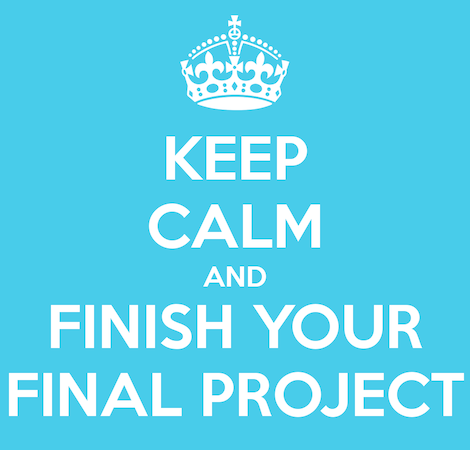

## Overview

<p style="line-height:1.75;font-size:16px">
It's time to put your skills to the test and take on a real-world data science project. You are given a dataset of ad impressions for Android users for a particular ad. Each line represents one impression for that ad and includes details such as timestamp, device, mobile carrier and more.

### The preprocessing steps that have been followed include :

## Generic Function  Definitions

Painted Text Message: 
$\color{red}{\text{Red}}$ Black 
$\color{blue}{\text{Blue}}$ 
$\color{Green}{\text{Green}}$
$\color{Yellow}{\text{Yellow}}$

Painted words between the text message 
$\color{red}{\text{Red}}$ 
and then return to black

$\color{blue}{\text{Blue text}}$ 
$\color{red}{\text{Red text}}$ 
$\color{blue}{\text{Blue text}}$


In [1]:
def bar_plot_feature(df, name):
     column=name
     plt.figure(figsize=(15, 12))
     plt.subplot(5, 1, 1)
     df[df["click"] == 0][column].hist(bins=35, color='red', label='click=0', alpha=0.8)
     df[df["click"] == 1][column].hist(bins=35, color='blue', label='click=1', alpha=0.8)
     plt.xlabel(column)
   
    
def mean_plot_feature(df, name):
    df.groupby(name).agg({'click':'mean'}).plot(figsize=(12,4))
    plt.ylabel('Number of clicks')
    plt.title(f' the mean number of clicks per {name}', fontsize=20);
    plt.axhline(y=0.068, color='r', linestyle='-')

    
    
def sum_plot_feature(d, name):
    df.groupby(name).agg({'click':'sum'}).plot(figsize=(12,4))
    plt.ylabel('Number of clicks')
    plt.title(f' the number of clicks by {name}', fontsize=20)

def double_plot_feature(d, name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,6))
    fig.suptitle(f'{name} subplots', fontsize=24)
    ax1.plot(df.groupby(name).agg({'click':'mean'}))
    ax1.set_title(f' mean clicks per {name}', fontsize=20)
    ax1.axhline(y=clickRate[1], color='r', linestyle='-')
        
    plt.subplot(1, 2, 2)
    plt.title(f' total clicks per {name}', fontsize=20);
    #ax3.figure(figsize=(12, 10))
    df[df["click"] == 0][name].hist(bins=35, color='red', label='click=0', alpha=0.8)
    df[df["click"] == 1][name].hist(bins=35, color='blue', label='click=1', alpha=0.8)
    plt.legend()    
    

def triple_plot_feature(d, name):
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(25,6))
    fig.suptitle(f'{name} subplots', fontsize=24)
    ax1.plot(df.groupby(name).agg({'click':'sum'}))
    ax1.set_title(f' total click per {name} ', fontsize=20)
    ax2.plot(df.groupby(name).agg({'click':'mean'}))
    ax2.set_title(f' mean clicks per {name} ', fontsize=20)
    ax2.axhline(y=0.068, color='r', linestyle='-')
        
    plt.subplot(1, 3, 3)
    plt.title(f' total clicks per {name}', fontsize=20);
    #ax3.figure(figsize=(12, 10))
    df[df["click"] == 0][name].hist(bins=35, color='red', label='click=0', alpha=0.8)
    df[df["click"] == 1][name].hist(bins=35, color='blue', label='click=1', alpha=0.8)
    plt.legend()


In [2]:
# global vailable 
categories = []
continues = []

# the following function calisified column to categorial or continues
def clasified_column (df, categorical_val, continous_val):
    for column in df.columns:
        print(f'==============================')
        if len(df[column].unique())<55:
            categorical_val.append(column)
            print(f"{column}[{len(df[column].unique())}] : {df[column].unique()}")
        else:
            continous_val.append(column)
            print(f"{column}[{len(df[column].unique())}]:")

In [3]:
import numpy as np
def print_na_info(df):
    naList =df.isnull().sum() 
    print (naList)
    if (naList.sum()==0): print("No missing data in your dataframe")
    else : print (f'There are total {naList.sum()} NA in my data fram')
        

In [4]:
# implement c atoi function 
def atoi(str):
        if str==None or str=='': return 0
        rs=str.strip()
        tempi=0
        for i in range(len(rs)):
            tempi=i
            if i==0 and rs[i]=='+':continue
            if i==0 and rs[i]=='-':continue
            if i==1 and (rs[0]=='+' or rs[0]=='-') and (rs[i]>'9' or rs[i]<'0'):
                return 0
            if rs[i]>'9' or rs[i]<'0':
                tempi=i-1
                break
        rs=rs[:(tempi+1)]
        if rs=='': return 0
        if int(rs)>2**31-1:
            return 2**31-1
        elif int(rs)<(-2**31):
            return -2**31
        else:
            return int(rs)
 

## 1. Browsing the data

In [5]:
TRAINING_SIZE = 300000

In [6]:
#  Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [7]:
tqdm.pandas()

In [8]:
df = pd.read_csv('data/android_bids_us.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148828 entries, 0 to 3148827
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     object
 4   user_isp       object
 5   device_maker   object
 6   device_model   object
 7   device_osv     object
 8   device_height  int64 
 9   device_width   int64 
 10  marketplace    object
 11  click          int64 
dtypes: int64(4), object(8)
memory usage: 288.3+ MB


In [9]:
df = df.sample(TRAINING_SIZE)
df.head(2)

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
2306784,7703e7cb-3590-4df9-be87-301a96cad7ec,1540586558932,com.chopperkhan.stickmantuber,NY,Sprint PCS,Motorola,E Play (5th Gen.),8.0.0,1280,720,chartboost,0
2083585,9452bd1c-6451-41ca-85cb-3b3daa27a1e2,1540339436755,com.mokuni.kib2,MD,AT&T Wireless,LG,K371,7.0,720,1280,chartboost,0


In [10]:
print_na_info(df)

bidid                0
utc_time             0
app_id               0
user_state           0
user_isp             4
device_maker     91718
device_model     91700
device_osv           0
device_height        0
device_width         0
marketplace          0
click                0
dtype: int64
There are total 183422 NA in my data fram


### We have 3 columns contain NA values:  user_isp, device_maker, device_model 

In [11]:
# check the click rate in the dataset
click_val = df["click"].value_counts()
print(click_val)
#The ratio between total 'none_click' and 'click' rows are 'none_click'/'click'
click_rate = click_val.values[0]/click_val.values[1]
print (f'ratio [click=0:click=1] is [{round(click_rate, 2)}:1]')

clickRate= df['click'].value_counts()/len(df)
clickRate
#The overall click through rate is approx. 17%, and approx. 83% is not clicked.

0    279836
1     20164
Name: click, dtype: int64
ratio [click=0:click=1] is [13.88:1]


0    0.932787
1    0.067213
Name: click, dtype: float64

### The overall click through rate is approx. 6.77%, and approx. 93.23% is not clicked.

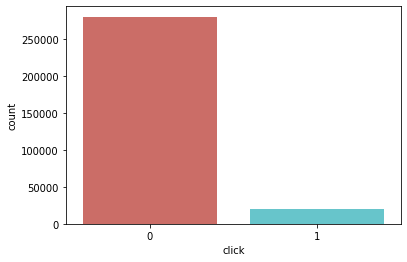

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='click',data=df, palette='hls')
plt.show();

#### we have 3148828 rows 11 features and 'click' target with rate of: [2935629: 213799  ] for [click=0: click=1]

In [13]:
df.describe()

,utc_time,device_height,device_width,click
count,3.000000e+05,300000.000000,300000.000000,300000.000000
mean,1.538333e+12,1180.799347,1151.190930,0.067213
std,2.320175e+09,518.465445,452.918742,0.250392
min,1.533578e+12,384.000000,240.000000,0.000000
25%,1.536466e+12,720.000000,720.000000,0.000000
50%,1.538473e+12,1080.000000,1080.000000,0.000000
75%,1.540090e+12,1280.000000,1280.000000,0.000000
max,1.542630e+12,3120.000000,3120.000000,1.000000


In [14]:
# check for duplicate rows
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = df[df.duplicated()]
len(duplicate)

0

In [15]:
# classified and count values for each colums
clasified_column(df, categories, continues)

bidid[298056]:
utc_time[299990]:
app_id[8849]:
user_state[51] : ['NY' 'MD' 'CT' 'CA' 'OH' 'WA' 'TN' 'OR' 'GA' 'FL' 'MA' 'TX' 'MI' 'DC'
 'KY' 'NC' 'IL' 'PA' 'MO' 'CO' 'VA' 'NJ' 'WV' 'AL' 'KS' 'MS' 'NV' 'SD'
 'IN' 'SC' 'LA' 'WI' 'MN' 'AZ' 'IA' 'NM' 'UT' 'NE' 'OK' 'ND' 'AR' 'WY'
 'MT' 'HI' 'ID' 'ME' 'NH' 'AK' 'RI' 'DE' 'VT']
user_isp[1906]:
device_maker[159]:
device_model[1370]:
device_osv[10] : ['8.0.0' '7.0' '6.0' '7.1.1' '8.1.0' '6.0.1' '7.1.2' '9' 'P' '7.1']
device_height[199]:
device_width[158]:
marketplace[1] : ['chartboost']
click[2] : [0 1]


In [16]:

app_id_count = df["app_id"].value_counts() 
number_of_app = len(app_id_count)

# number of bids at the top 10% of app sites
n_top_apps = app_id_count.head(int(0.1*number_of_app)).sum()

print("{} Rows({}%) bids the top 10% application sites({})".format(n_top_apps, int(n_top_apps/len(df)*100), number_of_app))


236018 Rows(78%) bids the top 10% application sites(8849)


In [17]:
df.shape

(300000, 12)

####  My target is to get much information as i can for those 10% top features


# Let's plot some features
the left plot describes total number of click per feature (device_osp)

the midle one describes the mean click per feature (device_osp): (sum of click=1) / (total row per) feature

the right hist describe the ratio between click and non-click per feature type

the $\color{red}{\text{Red line}}$ 
is the mean click rate of the entire data

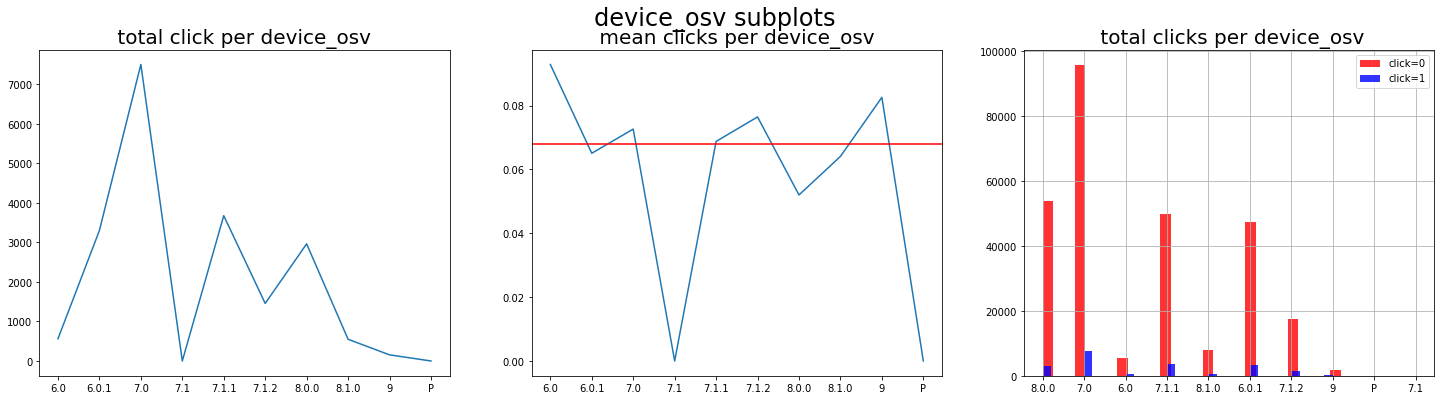

In [18]:
triple_plot_feature(df, 'device_osv')


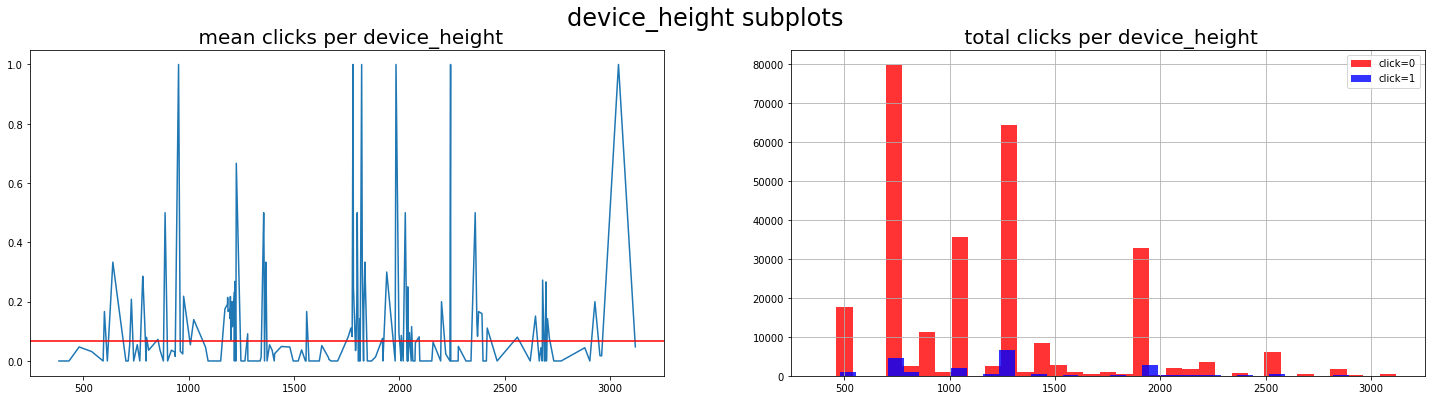

In [19]:
double_plot_feature(df, 'device_height')

#### There is nothing here that i think can help with predection.

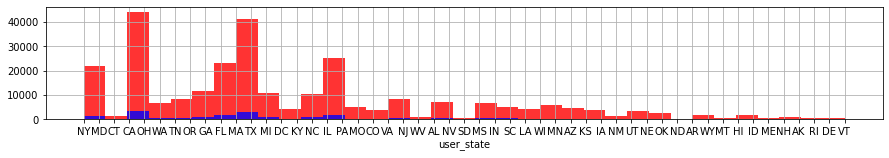

In [20]:
bar_plot_feature(df, 'user_state')

## 2. Data Manipulations

   ### 2.1 Managing null values: check null data at the entire dataset

In [21]:
print_na_info(df)

bidid                0
utc_time             0
app_id               0
user_state           0
user_isp             4
device_maker     91718
device_model     91700
device_osv           0
device_height        0
device_width         0
marketplace          0
click                0
dtype: int64
There are total 183422 NA in my data fram


In [22]:
# since we have few missing data for user_isp, i will fill missing data with unknown_isp
df['user_isp'].fillna('unkown_isp', inplace=True)

# 20% of the data or more is missing, we'll remove these columns
missing_list = df.columns[df.isna().sum() >= len(df)*0.2]
df.drop(missing_list, axis=1, inplace=True)
print_na_info(df)


bidid            0
utc_time         0
app_id           0
user_state       0
user_isp         0
device_osv       0
device_height    0
device_width     0
marketplace      0
click            0
dtype: int64
No missing data in your dataframe


### 2.2 Build application dataset info includes: click counters and click score taken form main df

In [23]:
#--------------------------------------------------------------
# add new column 'not_click' = !click for couner use
# ! it is importent to remove the columns before fit the model
#--------------------------------------------------------------
df['none_click'] = (df['click']+1)%2

# cteare application datafram click countes: click, not_click, click_count and click_score
app_df=df.groupby('app_id').agg({'click': sum, 'none_click': sum})
app_df['total_row_count'] = app_df['click'] + app_df['none_click']

# drop none_click from main df
df.drop(['none_click'], axis=1, inplace=True)


# rename column
app_df.rename(columns = {'click' : 'click_count', 'none_click' : 'none_click_count'}, inplace = True)
#=================================================================
#                             (number_of_click*13.77+1/13.77)
# add app_score column =  ----------------------------------------
#                                 number_of_not_click+1
#=================================================================
# 13.77 - is the ratio between non_click and click columns
app_df['click_app_score'] = (((app_df['click_count']*click_rate)+(1/click_rate))/(app_df['none_click_count']+1))



# sort appplication dataset by 'app_score'
#gb_app_id.sort_values(by=['app_score'],ascending=False, inplace=True)
app_df.sample(5)

,click_count,none_click_count,total_row_count,click_app_score
app_id,,,,
com.ptgs.realleopardsimulator,2,11,13,2.319005
com.toongo.subwayshrekadventure,0,7,7,0.009007
com.vrhero.pizzahouse,1,4,5,2.790011
com.wolfgangknecht.cupcake,0,2,2,0.024019
com.EpicBoss.FastRevenge5ShadesOfDarkness,2,5,7,4.638010


In [24]:
#verfiy none_click removed from df
df.head(2)

,bidid,utc_time,app_id,user_state,user_isp,device_osv,device_height,device_width,marketplace,click
2306784,7703e7cb-3590-4df9-be87-301a96cad7ec,1540586558932,com.chopperkhan.stickmantuber,NY,Sprint PCS,8.0.0,1280,720,chartboost,0
2083585,9452bd1c-6451-41ca-85cb-3b3daa27a1e2,1540339436755,com.mokuni.kib2,MD,AT&T Wireless,7.0,720,1280,chartboost,0


### 2.2 update  application dataset with app information from taken  Google Play

In [25]:
# update_app_df: add 'feature' to app_df with value: value
def update_app_df(app_id, feature, value):
    if (app_id in app_df.index):
         app_df.loc[app_id,feature] = int(value)

# cal update_app_df with value 1 for each category in category list
def update_categories(app_id, categories, categories_list):
    for category in categories_list:
        update_app_df(app_id, category, 1)



#### collect application info from google play files

In [26]:
from zipfile import ZipFile
import pickle
import re

app_details = ZipFile("data/play_apps.zip")
app_list=app_details.namelist()
nFiles= len(app_list)
print ('nFiles = ', nFiles)

for i in range(nFiles):
    app_file=app_list[i]
    app_info = pickle.loads(app_details.read(app_file))
    app_id = app_info.get('app_id')
    update_app_df(app_id, 'bids', int(app_info.get('bids')))
    update_categories(app_id, 'categories', app_info.get('category'))
    update_app_df(app_id, 'installs', atoi(app_info.get('installs')))
    update_app_df(app_id, 'free', int(app_info.get('free')))
    update_app_df(app_id, 'price', atoi(app_info.get('price')))

# fill 0 o all
app_df.fillna(0, inplace=True)

nFiles =  29463


In [27]:
#check for na
print_na_info(app_df)


click_count            0
none_click_count       0
total_row_count        0
click_app_score        0
bids                   0
EDUCATION              0
FAMILY_EDUCATION       0
installs               0
free                   0
price                  0
GAME_CASUAL            0
GAME_WORD              0
GAME_BOARD             0
GAME_SPORTS            0
GAME_ARCADE            0
FOOD_AND_DRINK         0
FAMILY_BRAINGAMES      0
FAMILY_CREATE          0
FAMILY_PRETEND         0
GAME_PUZZLE            0
GAME_ADVENTURE         0
GAME_CASINO            0
GAME_SIMULATION        0
GAME_CARD              0
GAME_STRATEGY          0
GAME_ACTION            0
TOOLS                  0
GAME_MUSIC             0
FAMILY_ACTION          0
GAME_ROLE_PLAYING      0
GAME_RACING            0
GAME_TRIVIA            0
ENTERTAINMENT          0
GAME_EDUCATIONAL       0
BUSINESS               0
VIDEO_PLAYERS          0
MUSIC_AND_AUDIO        0
LIFESTYLE              0
NEWS_AND_MAGAZINES     0
PHOTOGRAPHY            0


In [28]:
app_df.head(2)

,click_count,none_click_count,total_row_count,click_app_score,bids,EDUCATION,FAMILY_EDUCATION,installs,free,price,...,BEAUTY,DATING,HEALTH_AND_FITNESS,FINANCE,MAPS_AND_NAVIGATION,WEATHER,FAMILY_MUSICVIDEO,TRAVEL_AND_LOCAL,LIBRARIES_AND_DEMO,PRODUCTIVITY
app_id,,,,,,,,,,,,,,,,,,,,,
abc.FeetlyDash,0,1,1,0.036028,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abc.kids.preschool.learning.phonics.songs.videos,0,1,1,0.036028,1417.0,1.0,1.0,100.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.3 join df with app_df new added columns

In [29]:
#app_df.set_index('app_id', inplace=True)
df.set_index('app_id', inplace=True)

In [30]:
df.head()

,bidid,utc_time,user_state,user_isp,device_osv,device_height,device_width,marketplace,click
app_id,,,,,,,,,
com.chopperkhan.stickmantuber,7703e7cb-3590-4df9-be87-301a96cad7ec,1540586558932,NY,Sprint PCS,8.0.0,1280,720,chartboost,0
com.mokuni.kib2,9452bd1c-6451-41ca-85cb-3b3daa27a1e2,1540339436755,MD,AT&T Wireless,7.0,720,1280,chartboost,0
com.playgendary.tom,def95f05-22b1-44be-8b6e-548575aa4564,1534360629510,CT,Frontier Communications,7.0,1280,720,chartboost,0
com.morethangames.clashofcivilizations,2e453cff-106a-41ae-83a0-38434dc2d454,1535738756839,CA,Spectrum,6.0,1280,720,chartboost,0
com.racing.xtreme.driver.racing.mick,265e3be8-7d49-4a74-89cf-f7c9fd4f0d98,1536201690257,OH,AT&T Wireless,7.1.1,480,854,chartboost,0


In [31]:
df=df.join(app_df, how='left')
#df.info()

In [32]:
print(df.shape)
print(app_df.shape)

(300000, 67)
(8849, 58)


In [33]:
df.columns

Index(['bidid', 'utc_time', 'user_state', 'user_isp', 'device_osv',
       'device_height', 'device_width', 'marketplace', 'click', 'click_count',
       'none_click_count', 'total_row_count', 'click_app_score', 'bids',
       'EDUCATION', 'FAMILY_EDUCATION', 'installs', 'free', 'price',
       'GAME_CASUAL', 'GAME_WORD', 'GAME_BOARD', 'GAME_SPORTS', 'GAME_ARCADE',
       'FOOD_AND_DRINK', 'FAMILY_BRAINGAMES', 'FAMILY_CREATE',
       'FAMILY_PRETEND', 'GAME_PUZZLE', 'GAME_ADVENTURE', 'GAME_CASINO',
       'GAME_SIMULATION', 'GAME_CARD', 'GAME_STRATEGY', 'GAME_ACTION', 'TOOLS',
       'GAME_MUSIC', 'FAMILY_ACTION', 'GAME_ROLE_PLAYING', 'GAME_RACING',
       'GAME_TRIVIA', 'ENTERTAINMENT', 'GAME_EDUCATIONAL', 'BUSINESS',
       'VIDEO_PLAYERS', 'MUSIC_AND_AUDIO', 'LIFESTYLE', 'NEWS_AND_MAGAZINES',
       'PHOTOGRAPHY', 'SOCIAL', 'PERSONALIZATION', 'AUTO_AND_VEHICLES',
       'SPORTS', 'SHOPPING', 'BOOKS_AND_REFERENCE', 'ART_AND_DESIGN', 'COMICS',
       'BEAUTY', 'DATING', 'HEALTH_AND_FI

### 2.3 Feature engineering for date time features

In [34]:
import pytz
from datetime import datetime, timezone
import pandas as pd

states_tz = {
    'WA': 'US/Pacific',
    'OR': 'US/Pacific',
    'CA': 'US/Pacific',
    'NV': 'US/Pacific',
    'MT': 'US/Mountain',
    'ID': 'US/Mountain',
    'WY': 'US/Mountain',
    'UT': 'US/Mountain',
    'CO': 'US/Mountain',
    'NM': 'US/Mountain',
    'AZ': 'US/Mountain',
    'TX': 'US/Central',
    'OK': 'US/Central',
    'KS': 'US/Central',
    'MN': 'US/Central',
    'IA': 'US/Central',
    'MO': 'US/Central',
    'AR': 'US/Central',
    'LA': 'US/Central',
    'ND': 'US/Central',
    'SD': 'US/Central',
    'NE': 'US/Central',
    'WI': 'US/Central',
    'IL': 'US/Central',
    'MS': 'US/Central',
    'MI': 'US/Eastern',
    'VT': 'US/Eastern',
    'NH': 'US/Eastern',
    'ME': 'US/Eastern',
    'MA': 'US/Eastern',
    'RI': 'US/Eastern',
    'CT': 'US/Eastern',
    'OH': 'US/Eastern',
    'PA': 'US/Eastern',
    'NJ': 'US/Eastern',
    'KY': 'US/Eastern',
    'WV': 'US/Eastern',
    'MD': 'US/Eastern',
    'DE': 'US/Eastern',
    'VA': 'US/Eastern',
    'NC': 'US/Eastern',
    'SC': 'US/Eastern',
    'GA': 'US/Eastern',
    'NY': 'US/Eastern',
    'TN': 'US/Eastern',
    'IN': 'US/Eastern',
    'AL': 'US/Eastern',
    'FL': 'US/Eastern',
    'DC': 'US/Eastern',
    'HI': 'US/Hawaii',
    'AK': 'US/Alaska'
}


In [35]:
import json
cache_dict = dict()

def cache(f):
    #TODO: complete
    def cached_f(**kwargs):
        key = json.dumps(kwargs)
        if cache_dict.get(key, None) is None:
            #print('save to cache', key)
            cache_dict[key] = f(**kwargs)
             
        return cache_dict[key]
    return cached_f


In [36]:
# getMsTimezoneOffset recive US country code and return offset from utc in milliseconds
def getMsTimezoneOffset(state):
    timezone = pytz.timezone(states_tz[state])
    local_time=  timezone.localize(pd.to_datetime(0)) #init time 1.1.1970
    return int(local_time.astimezone(local_time.tz).utcoffset().total_seconds()*1000)


In [37]:
# add to data the following columns:
# local_time, year, tmonth, tday, tweekday, thour, is_weekend
from datetime import datetime
from dateutil import tz
from time import time, ctime

# use cache function to save time
cacheTimeZoneDiff= cache(getMsTimezoneOffset)
#call cacheTimeZoneDiff (state=state_val)

df['local_time']=df.progress_apply(lambda row: pd.to_datetime((row['utc_time']+cacheTimeZoneDiff (state=row['user_state']))*1000000), axis=1)


100%|██████████| 300000/300000 [00:47<00:00, 6256.78it/s]


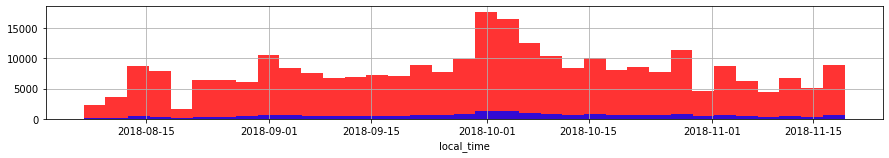

In [38]:
bar_plot_feature(df, 'local_time')

In [39]:

df['year'] = df['local_time'].dt.year
df['tmonth'] = df['local_time'].dt.month
df['tday'] = df['local_time'].dt.day
df['tweekday'] = df['local_time'].dt.day_name()
df['thour'] = df['local_time'].dt.hour
df['is_weekend'] = df.progress_apply(lambda row: row.loc['tweekday'] in ['Friday', 'Saturday'], axis=1)



100%|██████████| 300000/300000 [00:07<00:00, 37620.87it/s]


In [40]:
df.sample(5)

,bidid,utc_time,user_state,user_isp,device_osv,device_height,device_width,marketplace,click,click_count,...,TRAVEL_AND_LOCAL,LIBRARIES_AND_DEMO,PRODUCTIVITY,local_time,year,tmonth,tday,tweekday,thour,is_weekend
app_id,,,,,,,,,,,,,,,,,,,,,
unlogic.pixels.lat.mov,8703e42a-da46-4eee-b04f-4487ea04713e,1539404289519,CA,AT&T U-verse,7.1.1,1280,800,chartboost,0,2,...,0.0,0.0,0.0,2018-10-12 20:18:09.519,2018,10,12,Friday,20,True
com.sa.realmlm,5b597ec6-6073-496f-83fd-64b2e42786bd,1534079321065,CA,Digital Ocean,6.0.1,1920,1080,chartboost,0,4,...,0.0,0.0,0.0,2018-08-12 05:08:41.065,2018,8,12,Sunday,5,False
com.bytestudios.homeless.life.simulator,d5bc9a18-151e-4a35-9276-ba77b832bd48,1535461968570,IL,T-Mobile USA,7.1.1,1280,720,chartboost,0,4,...,0.0,0.0,0.0,2018-08-28 07:12:48.570,2018,8,28,Tuesday,7,False
com.hanamobiles.tumblingslots,5e35a229-fca2-493b-88eb-d824f7e31b97,1534493415925,IL,AT&T Wireless,8.0.0,720,1280,chartboost,0,5,...,0.0,0.0,0.0,2018-08-17 02:10:15.925,2018,8,17,Friday,2,True
com.pikpok.fl.play,7ba154e9-6e02-4628-a6a0-795d34e8426e,1537981447780,TN,T-Mobile USA,7.0,1280,720,chartboost,0,7,...,0.0,0.0,0.0,2018-09-26 12:04:07.780,2018,9,26,Wednesday,12,False


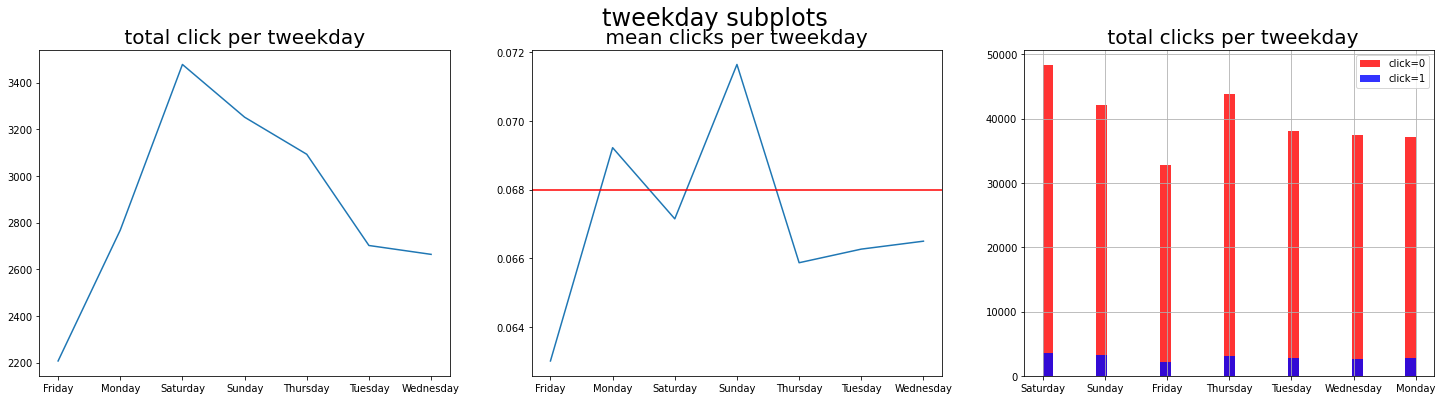

In [41]:
triple_plot_feature(df, 'tweekday')

### I can learn that the highest propabilty to click our ad is on Saturday the lowest is on Friday


$\color{red}{\text{maybe instead of categorized day.of.week for weekend or non-weekend, i should split it to 3 categories [Fri, Saturday, others]}}$

In [42]:
# def cat_day_of_week(weekday):
#     if(weekday=='Friday'):
#         return 'F'
#     elif (weekday=='Saturday'):
#         return 'S'
#     return 'D'
    
# df['day_cat'] = df.progress_apply(lambda row: cat_day_of_week(row.loc['tweekday']), axis=1)

### day_cat didn't improve the results - i believe it because we fit the model with dayofweek and the model knows to clasified it better

In [43]:
# triple_plot_feature(df, 'day_cat')

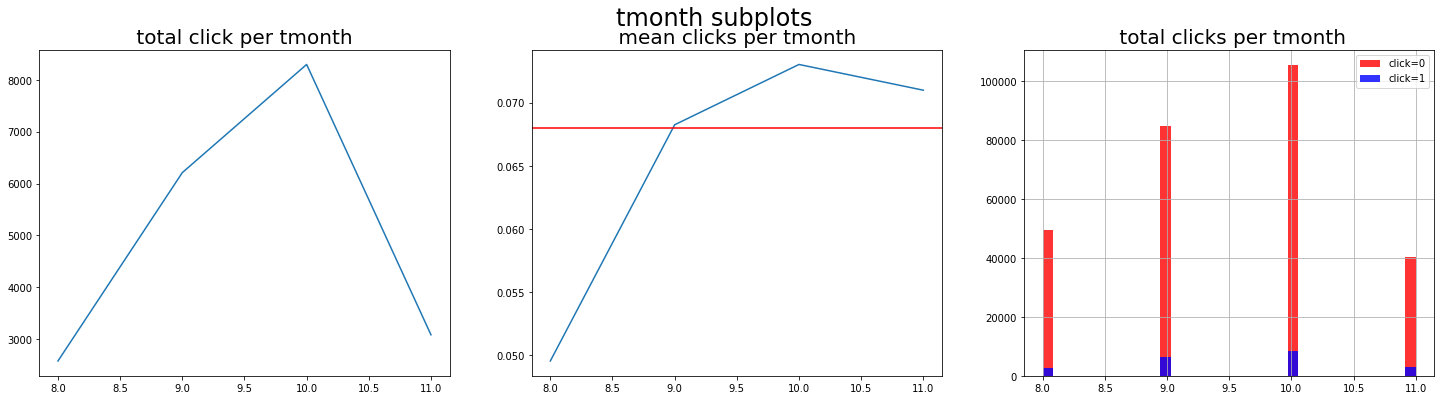

In [44]:
triple_plot_feature(df, 'tmonth')

### I can see here  that septemebr and october mean between click and non click are similer to November (traget 


$\color{red}{\text{maybe i should remove August from my training data in order to get better prediction}}$ 


In [45]:
print (f'df.shape beofre droping Aug is:{df.shape}')
#aug_index_names = df[df.tmonth == 8].index
#print (f'len(aug_index_names) :{len(aug_index_names)}')
#df = df.drop(aug_index_names, axis=0)
df = df[df.tmonth > 8]
print (f'df.shape after droping Aug is:{df.shape}')

df.shape beofre droping Aug is:(300000, 74)
df.shape after droping Aug is:(248004, 74)


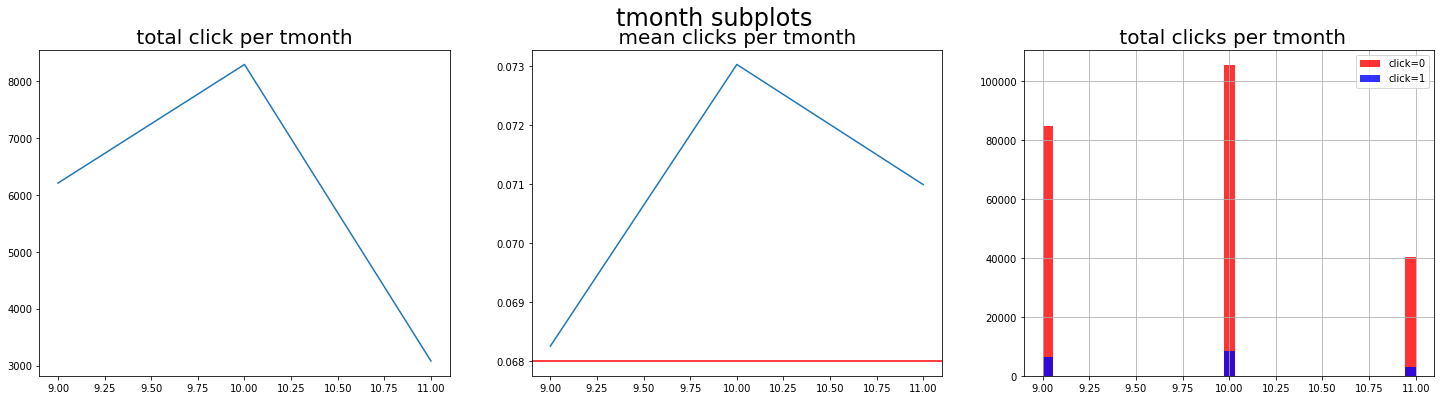

In [46]:
triple_plot_feature(df, 'tmonth')

##

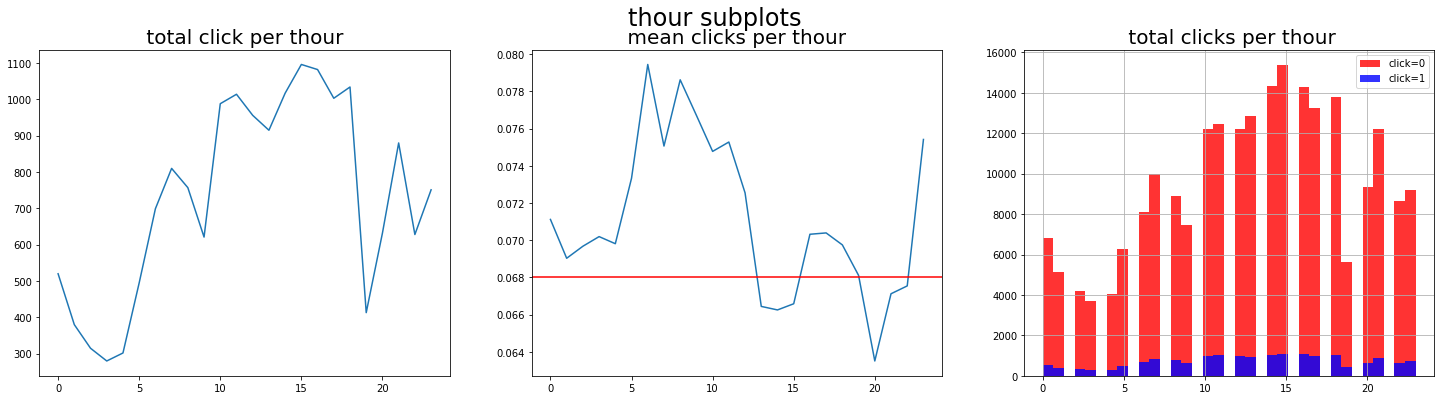

In [47]:
triple_plot_feature(df, 'thour')

In general, the highest number of clicks is around  hour 15 (1pm and 2pm), 


## 3. features selection 

### set app_id as index then drop it from data fram 

In [48]:
#df.set_index(df['app_id'], inplace=True)
df.head(1)

,bidid,utc_time,user_state,user_isp,device_osv,device_height,device_width,marketplace,click,click_count,...,TRAVEL_AND_LOCAL,LIBRARIES_AND_DEMO,PRODUCTIVITY,local_time,year,tmonth,tday,tweekday,thour,is_weekend
app_id,,,,,,,,,,,,,,,,,,,,,
abc.kids.preschool.learning.phonics.songs.videos,3159eaf6-31de-49f4-b387-61fec135348b,1541386218041,NJ,Sprint PCS,7.1.1,720,1280,chartboost,0,0,...,0.0,0.0,0.0,2018-11-04 21:50:18.041,2018,11,4,Sunday,21,False


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248004 entries, abc.kids.preschool.learning.phonics.songs.videos to zebi24.guess_5
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   bidid                248004 non-null  object        
 1   utc_time             248004 non-null  int64         
 2   user_state           248004 non-null  object        
 3   user_isp             248004 non-null  object        
 4   device_osv           248004 non-null  object        
 5   device_height        248004 non-null  int64         
 6   device_width         248004 non-null  int64         
 7   marketplace          248004 non-null  object        
 8   click                248004 non-null  int64         
 9   click_count          248004 non-null  int64         
 10  none_click_count     248004 non-null  int64         
 11  total_row_count      248004 non-null  int64         
 12  click_app_score      2

In [50]:
df['device_area'] = df['device_height']* df['device_width']

In [51]:
df['device_area'].head(5)

app_id
abc.kids.preschool.learning.phonics.songs.videos     921600
air.BRFree                                          3686400
air.BRFree                                           921600
air.BRFree                                           921600
air.BRFree                                           921600
Name: device_area, dtype: int64

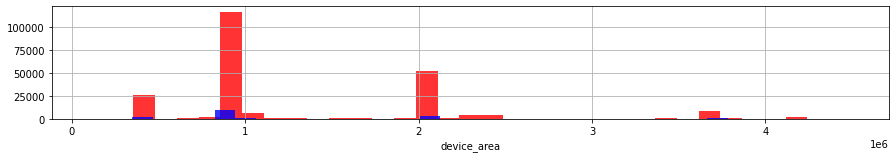

In [52]:
bar_plot_feature(df, 'device_area')

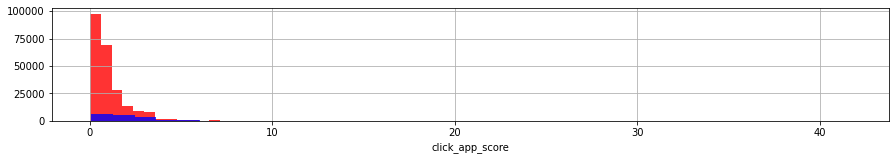

In [53]:
bar_plot_feature(df, 'click_app_score')

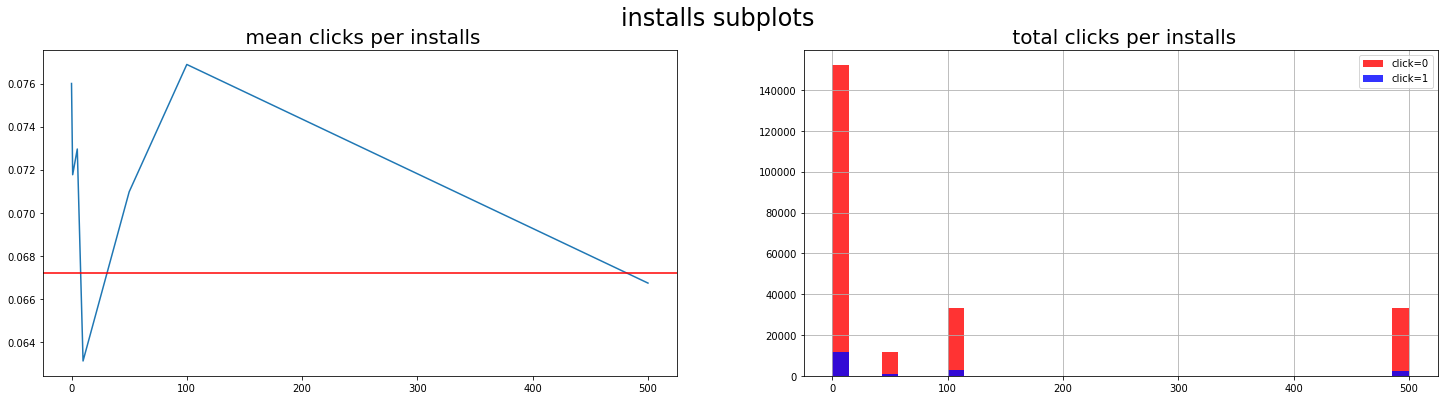

In [54]:
double_plot_feature(df, 'installs')

In [55]:
X = df.drop(['marketplace', 'utc_time', 'bidid', 'local_time','tday', 'year','user_isp', 'device_height', 'device_width','user_state'], axis=1)

In [56]:
categories = []
continues = []
clasified_column(X, categories, continues)

device_osv[10] : ['7.1.1' '7.0' '7.1.2' '6.0.1' '8.0.0' '8.1.0' '6.0' '9' '7.1' 'P']
click[2] : [0 1]
click_count[86]:
none_click_count[372]:
total_row_count[389]:
click_app_score[1151]:
bids[2060]:
EDUCATION[2] : [1. 0.]
FAMILY_EDUCATION[2] : [1. 0.]
installs[7] : [100.   5.  50.  10.   0.   1. 500.]
free[2] : [1. 0.]
price[1] : [0.]
GAME_CASUAL[2] : [0. 1.]
GAME_WORD[2] : [0. 1.]
GAME_BOARD[2] : [0. 1.]
GAME_SPORTS[2] : [0. 1.]
GAME_ARCADE[2] : [0. 1.]
FOOD_AND_DRINK[2] : [0. 1.]
FAMILY_BRAINGAMES[2] : [0. 1.]
FAMILY_CREATE[2] : [0. 1.]
FAMILY_PRETEND[2] : [0. 1.]
GAME_PUZZLE[2] : [0. 1.]
GAME_ADVENTURE[2] : [0. 1.]
GAME_CASINO[2] : [0. 1.]
GAME_SIMULATION[2] : [0. 1.]
GAME_CARD[2] : [0. 1.]
GAME_STRATEGY[2] : [0. 1.]
GAME_ACTION[2] : [0. 1.]
TOOLS[2] : [0. 1.]
GAME_MUSIC[2] : [0. 1.]
FAMILY_ACTION[2] : [0. 1.]
GAME_ROLE_PLAYING[2] : [0. 1.]
GAME_RACING[2] : [0. 1.]
GAME_TRIVIA[2] : [0. 1.]
ENTERTAINMENT[2] : [0. 1.]
GAME_EDUCATIONAL[2] : [0. 1.]
BUSINESS[2] : [0. 1.]
VIDEO_PLAYERS[2

In [57]:
# print (f'X.shape beofre droping Aug is:{X.shape}')
# aug_index_names = X[X.tmonth == 8].index
# print (f'len(aug_index_names) :{len(aug_index_names)}')
# X = X.drop(aug_index_names, axis=0)
# print (f'X.shape after droping Aug is:{X.shape}')

In [58]:
X = pd.get_dummies(X)
print (f'X.shape after get_dummies is:{X.shape}')

X.shape after get_dummies is:(248004, 80)


I used scalar since i have some continues feature (app_score, price, installes, ....)
But im not really know which scalar should i use

In [59]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X)

array([[-0.27628157, -0.50291133, -0.61232359, ..., -0.41729972,
        -0.38272548, -0.38106195],
       [-0.27628157, -0.50291133, -0.60660976, ..., -0.41729972,
        -0.38272548, -0.38106195],
       [-0.27628157, -0.50291133, -0.60660976, ..., -0.41729972,
        -0.38272548, -0.38106195],
       ...,
       [-0.27628157, -0.50291133, -0.61150733, ..., -0.41729972,
        -0.38272548, -0.38106195],
       [-0.27628157, -0.50291133, -0.61150733, ..., -0.41729972,
        -0.38272548, -0.38106195],
       [-0.27628157, -0.50291133, -0.61232359, ...,  2.39635914,
        -0.38272548, -0.38106195]])

In [60]:
X_train = X.drop("click", axis=1)[X["tmonth"] != X["tmonth"].max()]
y_train = X["click"][X["tmonth"] != X["tmonth"].max()]

X_test = X.drop("click", axis=1)[X["tmonth"] == df["tmonth"].max()]
y_test = X["click"][X["tmonth"] == X["tmonth"].max()]


In [61]:
X_train.head(2)

,click_count,none_click_count,total_row_count,click_app_score,bids,EDUCATION,FAMILY_EDUCATION,installs,free,price,...,device_osv_8.1.0,device_osv_9,device_osv_P,tweekday_Friday,tweekday_Monday,tweekday_Saturday,tweekday_Sunday,tweekday_Thursday,tweekday_Tuesday,tweekday_Wednesday
app_id,,,,,,,,,,,,,,,,,,,,,
air.BRFree,0,8,8,0.008006,332.0,0.0,0.0,5.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
air.EgyptianSenetFree,2,19,21,1.391403,205.0,0.0,0.0,100.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
X_train.shape

(204603, 79)

In [63]:
X_test.shape

(43401, 79)

In [64]:
best_accuracy= 0

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test):
        global best_accuracy
        pred_train = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred_train, output_dict=True))
        print("train Result:")        
        print(f"Accuracy Score: {accuracy_score(y_train, pred_train) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred_train)}\n")
        print("_______________________________________________")
        
        
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")   
        res= accuracy_score(y_test, pred) * 100
        best_accuracy = max(best_accuracy, res)
        print(f"Accuracy Score: {res :.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        print("_______________________________________________")

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.5, 1, 2]
mf_list = [2, 3, 5]
md_list = [3, 5, 9]


for learning_rate in lr_list:
    for max_f in mf_list:
        for max_depth in md_list:
            gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=learning_rate, max_features=max_f, max_depth=max_depth)
            gb_clf.fit(X_train, y_train)

            print("Learning rate:{}, max_features={}, max_depth={}".format(learning_rate, max_f, max_depth))
            print_score(gb_clf, X_train, y_train, X_test, y_test)



Learning rate:0.5, max_features=2, max_depth=3
train Result:
Accuracy Score: 93.00%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.930527      0.715232   0.93005       0.822879       0.915261
recall          0.999321      0.022334   0.93005       0.510828       0.930050
f1-score        0.963698      0.043316   0.93005       0.503507       0.898440
support    190096.000000  14507.000000   0.93005  204603.000000  204603.000000
Confusion Matrix: 
 [[189967    129]
 [ 14183    324]]

_______________________________________________
Test Result:
Accuracy Score: 92.98%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.930656     0.645161   0.92984      0.787909      0.910389
recall         0.998909     0.025966   0.92984      0.512437      0.929840
f1-score      

Learning rate:0.5, max_features=5, max_depth=5
train Result:
Accuracy Score: 93.16%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.932120      0.812274  0.931633       0.872197       0.923623
recall          0.999179      0.046529  0.931633       0.522854       0.931633
f1-score        0.964486      0.088017  0.931633       0.526251       0.902341
support    190096.000000  14507.000000  0.931633  204603.000000  204603.000000
Confusion Matrix: 
 [[189940    156]
 [ 13832    675]]

_______________________________________________
Test Result:
Accuracy Score: 92.78%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.930935     0.399209  0.927836      0.665072      0.893189
recall         0.996230     0.032782  0.927836      0.514506      0.927836
f1-score      

Learning rate:1, max_features=3, max_depth=9
train Result:
Accuracy Score: 82.50%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.932155      0.091825  0.824988       0.511990       0.872573
recall          0.875342      0.165162  0.824988       0.520252       0.824988
f1-score        0.902856      0.118030  0.824988       0.510443       0.847209
support    190096.000000  14507.000000  0.824988  204603.000000  204603.000000
Confusion Matrix: 
 [[166399  23697]
 [ 12111   2396]]

_______________________________________________
Test Result:
Accuracy Score: 81.80%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.931875     0.089313  0.817977      0.510594      0.872062
recall         0.867485     0.170075  0.817977      0.518780      0.817977
f1-score       0

Learning rate:2, max_features=3, max_depth=3
train Result:
Accuracy Score: 91.71%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.929050      0.067539  0.917142       0.498294       0.867966
recall          0.986128      0.013166  0.917142       0.499647       0.917142
f1-score        0.956738      0.022036  0.917142       0.489387       0.890465
support    190096.000000  14507.000000  0.917142  204603.000000  204603.000000
Confusion Matrix: 
 [[187459   2637]
 [ 14316    191]]

_______________________________________________
Test Result:
Accuracy Score: 91.69%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.929303     0.090484  0.916914      0.509893      0.869756
recall         0.985541     0.018825  0.916914      0.502183      0.916914
f1-score       0

In [69]:
print("________________________________________________________________")
print(f"The best accurency found for GradientBoostingClassifier is:{best_accuracy}%")
print("________________________________________________________________")

________________________________________________________________
The best accurency found for GradientBoostingClassifier is:93.00707356973341%
________________________________________________________________


In [70]:

# gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1, max_features=2, max_depth=5)
# gb_clf.fit(X_train, y_train)

# print_score(gb_clf, X_train, y_train, X_test, y_test)


In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
import numpy as np
from pprint import pprint 


model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4, 200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 10 models over 5 folds of cross validation (50 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 10 candidates
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
print(model.best_estimator_.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.27616377599617853, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 0.039204422272605496, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 148, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [72]:
bestModel = RandomForestClassifier(**model.best_params_)
bestModel.fit(X_train, y_train)
print_score(bestModel, X_train, y_train, X_test, y_test)

train Result:
Accuracy Score: 92.99%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.929815      1.000000  0.929869       0.964907       0.934791
recall          1.000000      0.010891  0.929869       0.505446       0.929869
f1-score        0.963631      0.021548  0.929869       0.492590       0.896834
support    190096.000000  14507.000000  0.929869  204603.000000  204603.000000
Confusion Matrix: 
 [[190096      0]
 [ 14349    158]]

_______________________________________________
Test Result:
Accuracy Score: 93.01%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.929997     1.000000  0.930071      0.964998      0.934966
recall         1.000000     0.014930  0.930071      0.507465      0.930071
f1-score       0.963729     0.029421  0.930071      0.496575 

In [73]:
bestModel = RandomForestClassifier(**model.best_params_)
bestModel.fit(X_train, y_train)
print_score(bestModel, X_train, y_train, X_test, y_test)
#y_pred = bestModel.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

train Result:
Accuracy Score: 92.99%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.929815      1.000000  0.929869       0.964907       0.934791
recall          1.000000      0.010891  0.929869       0.505446       0.929869
f1-score        0.963631      0.021548  0.929869       0.492590       0.896834
support    190096.000000  14507.000000  0.929869  204603.000000  204603.000000
Confusion Matrix: 
 [[190096      0]
 [ 14349    158]]

_______________________________________________
Test Result:
Accuracy Score: 93.01%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.929997     1.000000  0.930071      0.964998      0.934966
recall         1.000000     0.014930  0.930071      0.507465      0.930071
f1-score       0.963729     0.029421  0.930071      0.496575 

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

MAX_FEATURES=15
selector = RFE(estimator=LogisticRegression(max_iter=2000), n_features_to_select=MAX_FEATURES, step=20, verbose=5)
final_clf = LogisticRegression(max_iter=5000)
rfe_model = Pipeline([("rfe",selector),('model',final_clf)])



rfe_model.fit(X_train, y_train)
print_score(rfe_model, X_train, y_train, X_test, y_test)

Fitting estimator with 79 features.
Fitting estimator with 59 features.
Fitting estimator with 39 features.
Fitting estimator with 19 features.
train Result:
Accuracy Score: 92.92%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.931605      0.507705  0.929185       0.719655       0.901549
recall          0.996975      0.040877  0.929185       0.518926       0.929185
f1-score        0.963182      0.075662  0.929185       0.519422       0.900254
support    190096.000000  14507.000000  0.929185  204603.000000  204603.000000
Confusion Matrix: 
 [[189521    575]
 [ 13914    593]]

_______________________________________________
Test Result:
Accuracy Score: 92.91%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.932588     0.508523  0.929149      0.720556      0

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

MAX_FEATURES=20
selector = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=MAX_FEATURES, step=10, verbose=5)
final_clf = LogisticRegression(max_iter=10000)
rfe_model = Pipeline([("rfe",selector),('model',final_clf)])


rfe_model.fit(X_train, y_train)
print_score(rfe_model, X_train, y_train, X_test, y_test)

Fitting estimator with 79 features.
Fitting estimator with 69 features.
Fitting estimator with 59 features.
Fitting estimator with 49 features.
Fitting estimator with 39 features.
Fitting estimator with 29 features.
train Result:
Accuracy Score: 92.93%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.931499      0.520221  0.929312       0.725860       0.902338
recall          0.997254      0.039016  0.929312       0.518135       0.929312
f1-score        0.963256      0.072587  0.929312       0.517921       0.900104
support    190096.000000  14507.000000  0.929312  204603.000000  204603.000000
Confusion Matrix: 
 [[189574    522]
 [ 13941    566]]

_______________________________________________
Test Result:
Accuracy Score: 92.97%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted

In [76]:
#pip install optuna

In [77]:
import optuna

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
        
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = trial.suggest_int('max_depth', 1, 32)
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print(f'Accuracy: {trial.value}')
print(f'Best hyperparameters: {trial.params}')
best_accuracy = max(best_accuracy, trial.value*100)

[I 2021-05-11 12:43:35,366] A new study created in memory with name: no-name-235a4340-82dc-414d-b068-df8819ec2f48
[I 2021-05-11 12:43:38,878] Trial 0 finished with value: 0.9290968363122731 and parameters: {'n_estimators': 6, 'max_depth': 1}. Best is trial 0 with value: 0.9290968363122731.
[I 2021-05-11 12:43:41,830] Trial 1 finished with value: 0.9228945812133742 and parameters: {'n_estimators': 5, 'max_depth': 25}. Best is trial 0 with value: 0.9290968363122731.
[I 2021-05-11 12:43:44,051] Trial 2 finished with value: 0.9280704583999256 and parameters: {'n_estimators': 5, 'max_depth': 13}. Best is trial 0 with value: 0.9290968363122731.
[I 2021-05-11 12:43:46,246] Trial 3 finished with value: 0.9298397384202577 and parameters: {'n_estimators': 5, 'max_depth': 12}. Best is trial 3 with value: 0.9298397384202577.
[I 2021-05-11 12:43:50,314] Trial 4 finished with value: 0.9251281750511967 and parameters: {'n_estimators': 15, 'max_depth': 27}. Best is trial 3 with value: 0.92983973842025

[I 2021-05-11 12:45:44,484] Trial 42 finished with value: 0.9298837260450726 and parameters: {'n_estimators': 17, 'max_depth': 10}. Best is trial 42 with value: 0.9298837260450726.
[I 2021-05-11 12:45:47,629] Trial 43 finished with value: 0.9297762007399696 and parameters: {'n_estimators': 15, 'max_depth': 13}. Best is trial 42 with value: 0.9298837260450726.
[I 2021-05-11 12:45:50,755] Trial 44 finished with value: 0.929873951017336 and parameters: {'n_estimators': 19, 'max_depth': 9}. Best is trial 42 with value: 0.9298837260450726.
[I 2021-05-11 12:45:53,624] Trial 45 finished with value: 0.9298641759895995 and parameters: {'n_estimators': 19, 'max_depth': 7}. Best is trial 42 with value: 0.9298837260450726.
[I 2021-05-11 12:45:56,703] Trial 46 finished with value: 0.9298544009618629 and parameters: {'n_estimators': 19, 'max_depth': 9}. Best is trial 42 with value: 0.9298837260450726.
[I 2021-05-11 12:45:58,622] Trial 47 finished with value: 0.9194293338807348 and parameters: {'n_es

[I 2021-05-11 12:47:55,918] Trial 85 finished with value: 0.9298250758786528 and parameters: {'n_estimators': 18, 'max_depth': 11}. Best is trial 62 with value: 0.9298886135589409.
[I 2021-05-11 12:47:59,611] Trial 86 finished with value: 0.9298299633925211 and parameters: {'n_estimators': 20, 'max_depth': 13}. Best is trial 62 with value: 0.9298886135589409.
[I 2021-05-11 12:48:02,538] Trial 87 finished with value: 0.9298690635034678 and parameters: {'n_estimators': 16, 'max_depth': 9}. Best is trial 62 with value: 0.9298886135589409.
[I 2021-05-11 12:48:05,309] Trial 88 finished with value: 0.929766425712233 and parameters: {'n_estimators': 16, 'max_depth': 7}. Best is trial 62 with value: 0.9298886135589409.
[I 2021-05-11 12:48:07,934] Trial 89 finished with value: 0.9293069994086108 and parameters: {'n_estimators': 19, 'max_depth': 5}. Best is trial 62 with value: 0.9298886135589409.
[I 2021-05-11 12:48:11,267] Trial 90 finished with value: 0.9298544009618627 and parameters: {'n_es

Accuracy: 0.9298886135589409
Best hyperparameters: {'n_estimators': 19, 'max_depth': 10}


In [78]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=11, n_estimators=15, learning_rate=0.05).fit(X_train, y_train)
#predictions = gbm.predict(X_test)
print_score(gbm, X_train, y_train, X_test, y_test)


In [79]:
print("________________________________________________________________")
print(f"The best accurency found  is:{best_accuracy}%")
print("________________________________________________________________")

________________________________________________________________
The best accurency found  is:93.00707356973341%
________________________________________________________________


In [80]:
!aws s3 cp  ./Final_Project-dorons-uatt_15.ipynb s3://uatt-e1-dorons/dorons/Final_Project-dorons-uatt_15.ipynb

# Guidelines

<p style="line-height:1.75;font-size:16px">
You will have two weeks to complete this project during which we will have two half-days dedicated to this. Besides giving you the chance to gain experience and showcase what you've learned, this project is intended to give you a glimpse into the actual process and work of a data scientist.<br> Before we talk about the task itself, here are some important guidelines:<br>
1\. <b>Show your work</b> - if you've tried something and it didn't work that's fine, don't delete it. Data science is an iterative process and we can learn a lot from what didn't work. Explain what didn't work and the reasons for it.<br>
2\. <b>Explain your work</b> - don't just write a bunch of code and the final output. Explain the motivation for each step you take, describe the results you got and what they mean. <br>
3\. <b>Use visualizations</b> - while exploring the data or when trying to convey an important message, use plots to help you. That being said, don't force yourself to add plots if they're not really needed.<br>
4\. <b>Plan ahead</b> - if you start working on the project near the submission date you will have less time to ask questions and come up with ideas.<br>
5\. <b>Google is your friend</b> - while we've learned the basic skills required to complete this project, there are many other techniques and ideas we didn't have time to talk about. Don't limit yourself to the lessons, search for similar problems and how to approach them, exchange ideas with colleagues and don't be afraid to try new ideas. <br>
6\. <b>It's not about the score</b> - while reaching a good prediction score is nice, it's not the main purpose of this project. Use this project to show your understanding and reasoning as well as your technical skills.<br>
7\. <b>Write clean code</b> - make sure you write code that is easy to read and understand. Give meaningful names, use functions, add comments if needed.<br>
8\. <b>Test before submission</b> - your work should be submitted as a Jupyter Notebook. Before submitting it, make sure you run it from start to finish and verify that there are no errors.<br>
9\. <b>Enjoy it</b> - try to have fun working on this, be curious, look for interesting insights and take pride in completing a real-world project end-to-end.

# Tips

<p style="line-height:1.75;font-size:16px">
1\. Since the data is time sensitive, split it so that the test data will be the last month of data and the training data will be anything that came before that.<br>
2\. `play_apps.zip` is data from Google Play about the various apps in the dataset. You can use this to augment the impressions dataset.<br>
3\. The data is collected from customers in the US (multiple timezones).<br>